# Importing Dependencies

In [1]:
pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 8.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Data Preprocessing

## Importing the dataset

In [3]:
retail_data = pd.read_excel("Online Retail.xlsx")

In [4]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
retail_data['UnitPrice'].sum()

2498803.974

In [6]:
retail_data['InvoiceNo'].nunique()

25900

In [7]:
retail_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
missing = retail_data.isnull().sum().reset_index()
missing

,index,0
0,InvoiceNo,0
1,StockCode,0
2,Description,1454
3,Quantity,0
4,InvoiceDate,0
5,UnitPrice,0
6,CustomerID,135080
7,Country,0


In [10]:
missing.columns = ['Features', 'Total_missing']

missing

,Features,Total_missing
0,InvoiceNo,0
1,StockCode,0
2,Description,1454
3,Quantity,0
4,InvoiceDate,0
5,UnitPrice,0
6,CustomerID,135080
7,Country,0


In [11]:
missing['Total_missing']

0         0
1         0
2      1454
3         0
4         0
5         0
6    135080
7         0
Name: Total_missing, dtype: int64

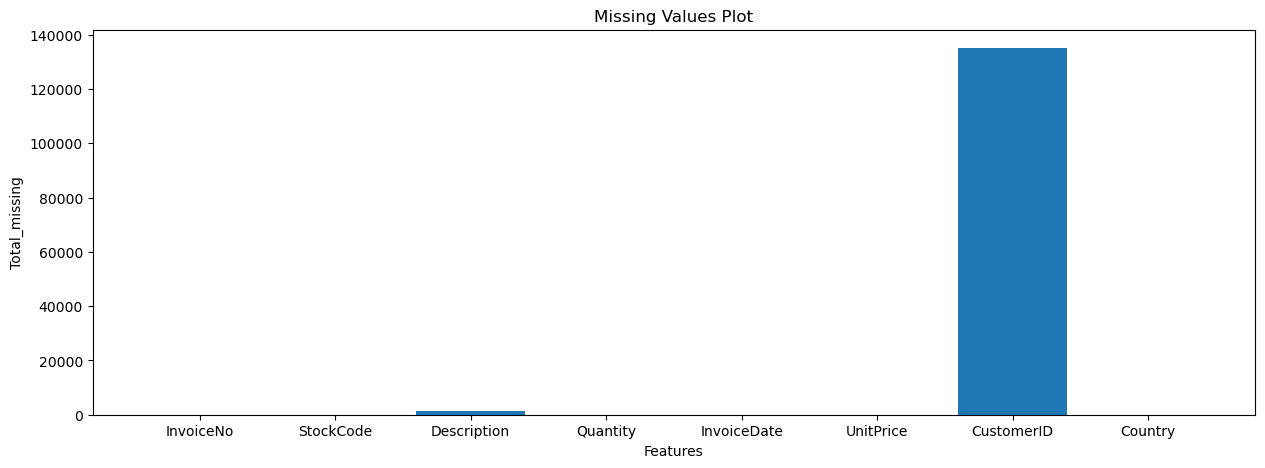

In [12]:
plt.figure(figsize = (15,5))
plt.bar(missing['Features'],missing['Total_missing'])
plt.xlabel("Features")
plt.ylabel("Total_missing")
plt.title("Missing Values Plot")
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


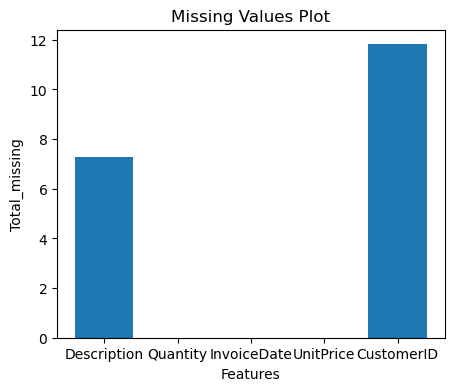

In [13]:
plt.figure(figsize = (5,4))
plt.bar(missing['Features'],np.log(missing['Total_missing']))
plt.xlabel("Features")
plt.ylabel("Total_missing")
plt.title("Missing Values Plot")
plt.show()

In [14]:
country_count = retail_data['Country'].value_counts().reset_index()
country_count.head()

,index,Country
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533


In [15]:
country_count.columns = ['Country','Count']
country_count.head()

,Country,Count
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533


In [16]:
country_count.head()

,Country,Count
0,United Kingdom,495478
1,Germany,9495
2,France,8557
3,EIRE,8196
4,Spain,2533


In [17]:
country_count['log_Count']= np.log(country_count['Count'])
country_count.head()

,Country,Count,log_Count
0,United Kingdom,495478,13.113278
1,Germany,9495,9.158521
2,France,8557,9.054505
3,EIRE,8196,9.011402
4,Spain,2533,7.837160


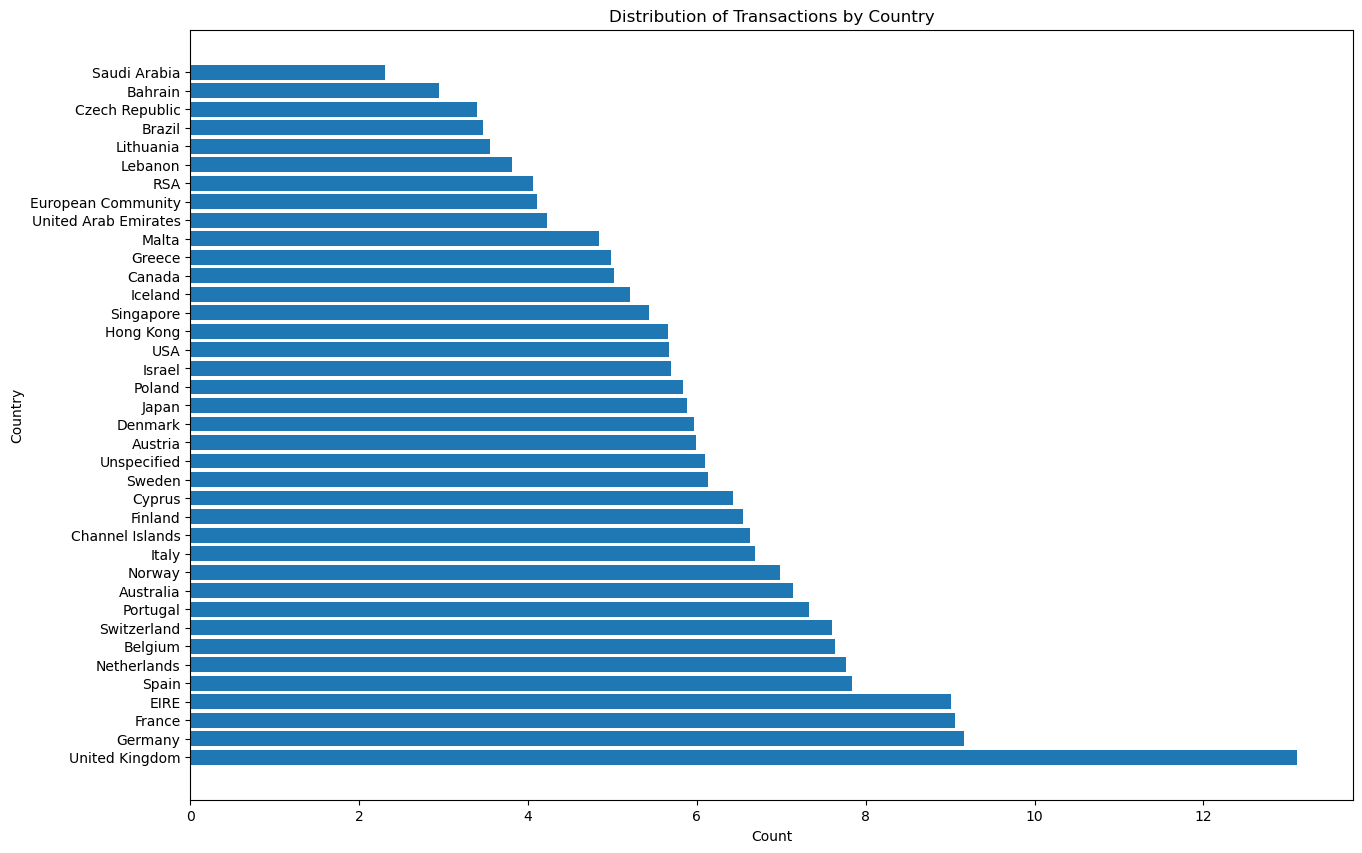

In [18]:
plt.figure(figsize = (15,10))
plt.barh(country_count['Country'], country_count['log_Count'])
plt.xlabel('Count')
plt.ylabel('Country')
plt.title("Distribution of Transactions by Country")
plt.show()

In [19]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [20]:
retail_data.shape

(541909, 8)

In [21]:
# Removing spaces from the begining 
#retail_data['Description'] = retail_data['Description'].str.strip

In [22]:
# Removing duplicate invoices
retail_data.dropna(axis=0, subset=['InvoiceNo'], inplace=True)

In [23]:
# Converting the Invoice No. to a string, so we can remove cancelled transactions
retail_data['InvoiceNo'] = retail_data['InvoiceNo'].astype('str')

In [24]:
# Removing cancelled transactions
retail_data = retail_data[~retail_data['InvoiceNo'].str.contains('C')]

In [25]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [26]:
# Extracting transactions from the dataset in such a way to fit into the apriori algorithm,
# we selected the InvoiceNo and the Descriptions and sum them on their quatity 
basket_data = (retail_data.groupby(['InvoiceNo','Description'])['Quantity']
               .sum().unstack().reset_index().fillna(0)
               .set_index('InvoiceNo'))

In [27]:
# Viewing the data
basket_data.head()
# The data below represents the frequncy of occurence of each item on each InvoiceNo
# 0 signifying that the product was not on the invoice and n signifies that the product was on the invoice n times

Description,20713,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:

def values_encoding(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1

basket_data = basket_data.applymap(values_encoding)


In [29]:
#Generating the frequent itemsets
frequent_itemsets = apriori(basket_data, min_support=0.03, use_colnames=True).sort_values("support",ascending=False)
frequent_itemsets.head(10)

C:\Users\Admin\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
114,0.109656,(WHITE HANGING HEART T-LIGHT HOLDER)
46,0.101504,(JUMBO BAG RED RETROSPOT)
91,0.096507,(REGENCY CAKESTAND 3 TIER)
77,0.081805,(PARTY BUNTING)
63,0.075885,(LUNCH BAG RED RETROSPOT)
6,0.070597,(ASSORTED COLOUR BIRD ORNAMENT)
99,0.067200,(SET OF 3 CAKE TINS PANTRY DESIGN )
72,0.064047,(PACK OF 72 RETROSPOT CAKE CASES)
57,0.061766,(LUNCH BAG BLACK SKULL.)
69,0.060602,(NATURAL SLATE HEART CHALKBOARD )


In [30]:
(retail_data['Description'].value_counts()).head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2327
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
ASSORTED COLOUR BIRD ORNAMENT         1489
SET OF 3 CAKE TINS PANTRY DESIGN      1399
PACK OF 72 RETROSPOT CAKE CASES       1370
LUNCH BAG  BLACK SKULL.               1328
NATURAL SLATE HEART CHALKBOARD        1263
Name: Description, dtype: int64

In [31]:
#Apply association rules
retail_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values("lift",ascending=False).reset_index(drop=True)
retail_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.049248,0.037166,0.030713,0.623645,16.779804,0.028883,2.558314,0.989116
1,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.037166,0.049248,0.030713,0.826371,16.779804,0.028883,5.475760,0.976705
2,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.049248,0.051722,0.037263,0.756650,14.629045,0.034716,3.896768,0.979901
3,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.051722,0.049248,0.037263,0.720450,14.629045,0.034716,3.401012,0.982458
4,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.050995,0.047550,0.031053,0.608944,12.806462,0.028628,2.435585,0.971453
5,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.047550,0.050995,0.031053,0.653061,12.806462,0.028628,2.735368,0.967940
6,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.101504,0.059098,0.040029,0.394359,6.673028,0.034030,1.553566,0.946185
7,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.059098,0.101504,0.040029,0.677340,6.673028,0.034030,2.784651,0.903540
8,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.061766,0.075885,0.031101,0.503535,6.635457,0.026414,1.861389,0.905206
9,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.075885,0.061766,0.031101,0.409847,6.635457,0.026414,1.589813,0.919036


In [32]:
retail_rules.value_counts().sum()

14

In [33]:
frequent_itemsets = apriori(basket_data, min_support=0.02, use_colnames=True).sort_values("support",ascending=False)
frequent_itemsets.head(10)

C:\Users\Admin\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
260,0.109656,(WHITE HANGING HEART T-LIGHT HOLDER)
100,0.101504,(JUMBO BAG RED RETROSPOT)
193,0.096507,(REGENCY CAKESTAND 3 TIER)
154,0.081805,(PARTY BUNTING)
125,0.075885,(LUNCH BAG RED RETROSPOT)
15,0.070597,(ASSORTED COLOUR BIRD ORNAMENT)
212,0.067200,(SET OF 3 CAKE TINS PANTRY DESIGN )
146,0.064047,(PACK OF 72 RETROSPOT CAKE CASES)
118,0.061766,(LUNCH BAG BLACK SKULL.)
136,0.060602,(NATURAL SLATE HEART CHALKBOARD )


In [34]:
retail_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values("lift",ascending=False).reset_index(drop=True)
retail_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.037263,0.037166,0.026298,0.705729,18.988353,0.024913,3.271930,0.984004
1,(PINK REGENCY TEACUP AND SAUCER),"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC...",0.037166,0.037263,0.026298,0.707572,18.988353,0.024913,3.292215,0.983904
2,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.049248,0.029064,0.026298,0.533990,18.373184,0.024867,2.083511,0.994553
3,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.029064,0.049248,0.026298,0.904841,18.373184,0.024867,9.991237,0.973877
4,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.049248,0.037166,0.030713,0.623645,16.779804,0.028883,2.558314,0.989116
...,...,...,...,...,...,...,...,...,...,...
155,(LUNCH BAG RED RETROSPOT),(JUMBO BAG RED RETROSPOT),0.075885,0.101504,0.028093,0.370205,3.647188,0.020390,1.426647,0.785418
156,(NATURAL SLATE HEART CHALKBOARD ),(WHITE HANGING HEART T-LIGHT HOLDER),0.060602,0.109656,0.020136,0.332266,3.030088,0.013491,1.333382,0.713198
157,(WHITE HANGING HEART T-LIGHT HOLDER),(NATURAL SLATE HEART CHALKBOARD ),0.109656,0.060602,0.020136,0.183628,3.030088,0.013491,1.150699,0.752491
158,(JUMBO BAG RED RETROSPOT),(WHITE HANGING HEART T-LIGHT HOLDER),0.101504,0.109656,0.021786,0.214627,1.957286,0.010655,1.133658,0.544341


In [35]:
retail_rules.value_counts().sum()

160

In [36]:
basket_data['JUMBO BAG RED RETROSPOT'].sum()

2092

In [37]:
basket_data['LUNCH BAG RED RETROSPOT'].sum()

1564